<a href="https://colab.research.google.com/github/jyns417/Datathon/blob/main/Eunbi_datathon_1002(v1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 120 years of Olympic history: athletes and results

- basic bio data on athletes and medal results from Athens 1896 to Rio 2016
- The file athlete_events.csv contains 271116 rows and 15 columns. Each row corresponds to an individual athlete competing in an individual Olympic event (athlete-events).
- The file non_regisons.esv contains NOC (National Olympic Committee 3 letter code),
Country name (matches with regions in map_data("world"))
- https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results/data?select=noc_regions.csv



## 1. 데이터 수집

In [28]:
# 필요 라이브러리 import
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [29]:
# 데이터셋 가져오기
data = pd.read_csv('/content/drive/MyDrive/data/olympic/athlete_events.csv')
regions = pd.read_csv('/content/drive/MyDrive/data/olympic/noc_regions.csv')

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
type(regions)

pandas.core.frame.DataFrame

## 2. 데이터 전처리
- 데이터 정제
    - 정제가 필요한 결측값, 이상값 등 파악
    - 결측값과 이상값에 대한 처리 기준 정하고, 제거 or 임의의 값으로 대체
- 데이터 변환
    - 데이터 유형의 형태 변환
    - 데이터 범위를 표준화(정규화)로 일치
    - 기존 변수 이용하여 새로운 변수 생성/선택

In [5]:
# 데이터셋 확인
print("athlete events data:")
print(data.head())
print("\n regions data:")
print(regions.head())

athlete events data:
   ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2    

In [6]:
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [7]:
data.tail(n=5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
271111,135569,Andrzej ya,M,29.0,179.0,89.0,Poland-1,POL,1976 Winter,1976,Winter,Innsbruck,Luge,Luge Mixed (Men)'s Doubles,NaN
271112,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Individual",NaN
271113,135570,Piotr ya,M,27.0,176.0,59.0,Poland,POL,2014 Winter,2014,Winter,Sochi,Ski Jumping,"Ski Jumping Men's Large Hill, Team",NaN
271114,135571,Tomasz Ireneusz ya,M,30.0,185.0,96.0,Poland,POL,1998 Winter,1998,Winter,Nagano,Bobsleigh,Bobsleigh Men's Four,NaN
271115,135571,Tomasz Ireneusz ya,M,34.0,185.0,96.0,Poland,POL,2002 Winter,2002,Winter,Salt Lake City,Bobsleigh,Bobsleigh Men's Four,NaN


In [8]:
regions.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [9]:
regions.tail(n=5)

,NOC,region,notes
225,YEM,Yemen,NaN
226,YMD,Yemen,South Yemen
227,YUG,Serbia,Yugoslavia
228,ZAM,Zambia,NaN
229,ZIM,Zimbabwe,NaN


In [10]:
# 데이터 행, 열 확인
data.shape

(271116, 15)

In [11]:
# 컬럼 이름 확인
data.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [12]:
# 데이터 타입 정보 확인
data.dtypes

,0
ID,int64
Name,object
Sex,object
Age,float64
Height,float64
Weight,float64
Team,object
NOC,object
Games,object
Year,int64


In [13]:
# 데이터 정보 확인
data.describe(include='object')

,Name,Sex,Team,NOC,Games,Season,City,Sport,Event,Medal
count,271116,271116,271116,271116,271116,271116,271116,271116,271116,39783
unique,134732,2,1184,230,51,2,42,66,765,3
top,Robert Tait McKenzie,M,United States,USA,2000 Summer,Summer,London,Athletics,Football Men's Football,Gold
freq,58,196594,17847,18853,13821,222552,22426,38624,5733,13372


In [14]:
# null값 개수 확인
data.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [15]:
# 데이터 전체 정보 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [22]:
# 컬럼 이름 확인
data.columns

Index(['Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Year',
       'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [16]:
# ID 와 Games 열 삭제
data_cleaned = data.drop(["ID", "Games"], axis=1)
print({data.shape})
print({data_cleaned.shape})
data_cleaned.head()

{(271116, 15)}
{(271116, 13)}


,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [17]:
# Age, Height, Weight 결측값 채우기
data_cleaned['Age'].fillna((data_cleaned['Age'].mean()), inplace=True)       # 평균값으로 채우기
data_cleaned['Height'].fillna((data_cleaned['Height'].mean()), inplace=True)
data_cleaned['Weight'].fillna((data_cleaned['Weight'].mean()), inplace=True)

<ipython-input-17-d625300f698c>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_cleaned['Age'].fillna((data_cleaned['Age'].mean()), inplace=True)       # 평균값으로 채우기
<ipython-input-17-d625300f698c>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col

In [21]:
# region 데이터와 병합

# 1. region 데이터 - 1) note열 삭제 2) region -> Country로 이름 변경
region_revised = regions
# region_revised.drop("notes", axis=1, inplace=True)
region_revised.rename(columns={"region":"Country"}, inplace=True)
region_revised.head()

,NOC,Country
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania
3,ALG,Algeria
4,AND,Andorra


In [24]:
# region 데이터와 병합

# 2. cleaned_data 와 region_revised 데이터 합치기
data_cleaned_revised = data_cleaned.merge(region_revised,
                                          left_on = 'NOC',
                                          right_on = 'NOC',
                                          how = 'left')
data_cleaned_revised.shape

(271116, 14)

In [25]:
# 데이터 확인
olympic_data = data_cleaned_revised
olympic_data.head()

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,Country
0,A Dijiang,M,24.0,180.00000,80.000000,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.00000,60.000000,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China
2,Gunnar Nielsen Aaby,M,24.0,175.33897,70.702393,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark
3,Edgar Lindenau Aabye,M,34.0,175.33897,70.702393,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
4,Christine Jacoba Aaftink,F,21.0,185.00000,82.000000,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands


In [ ]:
data_event = pd.unique(data_cleaned.Event)
data_temp = data.copy()
height_wieight_list = ["Height, Weight"]

## 데이터 분석

In [26]:
# 데이터 기초 분석
data_cleaned_revised.describe()

,Age,Height,Weight,Year
count,271116.000000,271116.00000,271116.000000,271116.000000
mean,25.556898,175.33897,70.702393,1978.378480
std,6.280857,9.27810,12.574690,29.877632
min,10.000000,127.00000,25.000000,1896.000000
25%,22.000000,170.00000,63.000000,1960.000000
50%,25.000000,175.33897,70.702393,1988.000000
75%,28.000000,180.00000,75.000000,2002.000000
max,97.000000,226.00000,214.000000,2016.000000


In [27]:
data_cleaned_revised.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 14 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Name     271116 non-null  object 
 1   Sex      271116 non-null  object 
 2   Age      271116 non-null  float64
 3   Height   271116 non-null  float64
 4   Weight   271116 non-null  float64
 5   Team     271116 non-null  object 
 6   NOC      271116 non-null  object 
 7   Year     271116 non-null  int64  
 8   Season   271116 non-null  object 
 9   City     271116 non-null  object 
 10  Sport    271116 non-null  object 
 11  Event    271116 non-null  object 
 12  Medal    39783 non-null   object 
 13  Country  270746 non-null  object 
dtypes: float64(3), int64(1), object(10)
memory usage: 29.0+ MB


In [32]:
# 성별로 묶기
data_gender = data_cleaned_revised['Sex'].value_counts()
print("Male & Female\n", data_gender.head())

Male & Female
 Sex
M    196594
F     74522
Name: count, dtype: int64


In [33]:
# 올림픽 개최시 메달 현황
data_medal = data_cleaned_revised.dropna(subset=['Medal'])
medal_counts = data_medal.groupby(['Year', 'Medal']).size().unstack(fill_value=0)
medal_counts.columns = ['Num_Bronze', 'Num_Gold', 'Num_Silver']
medal_counts.reset_index(inplace=True)
medal_counts

,Year,Num_Bronze,Num_Gold,Num_Silver
0,1896,38,62,43
1,1900,175,201,228
2,1904,150,173,163
3,1906,145,157,156
4,1908,256,294,281
5,1912,300,326,315
6,1920,367,493,448
7,1924,311,332,319
8,1928,281,275,267
9,1932,232,261,246


In [36]:
# 올림픽 참가자수
athlete_counts = data_cleaned_revised['Year'].value_counts().sort_index()
athlete_counts

,count
Year,
1896,380
1900,1936
1904,1301
1906,1733
1908,3101
1912,4040
1920,4292
1924,5693
1928,5574


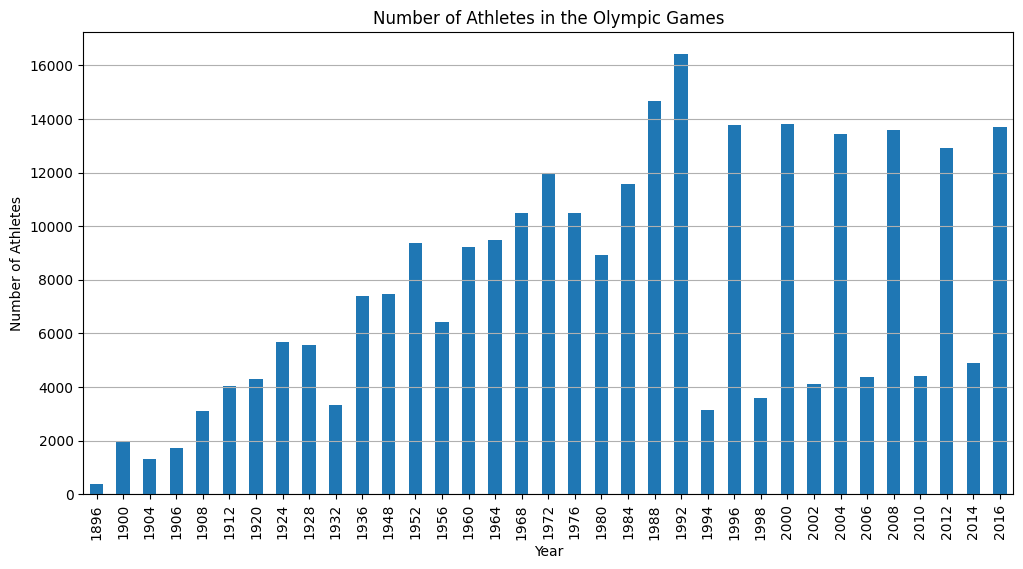

In [38]:
# 시각화
plt.figure(figsize=(12, 6))
athlete_counts.plot(kind='bar')
plt.title('Number of Athletes in the Olympic Games')
plt.xlabel('Year')
plt.ylabel('Number of Athletes')
plt.grid(axis='y')
plt.show()